In [179]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [180]:
df = pd.read_csv('wine-clustering.csv')

In [181]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

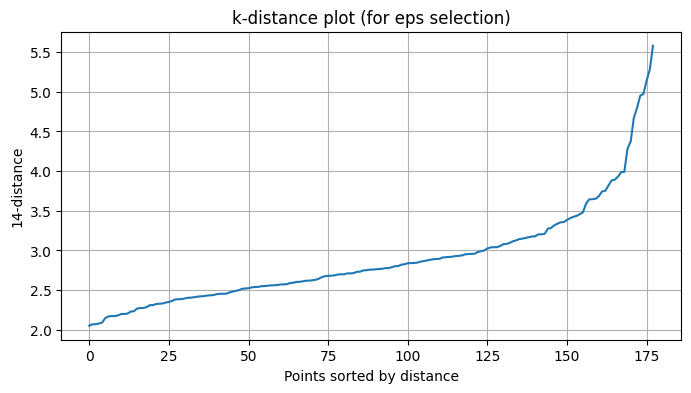

In [182]:
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

scale = StandardScaler()

scaled=scale.fit_transform(df)
X_scaled =pd.DataFrame(scaled,columns=df.columns)

min_samples= 14 
nn =NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances,indices=nn.kneighbors(X_scaled)

k_distances = distances[:, -1]   # distance to the k-th nearest neighbor
k_distances_sorted = np.sort(k_distances)

plt.figure(figsize=(8,4))
plt.plot(k_distances_sorted)
plt.ylabel(f"{min_samples}-distance")
plt.xlabel("Points sorted by distance")
plt.title("k-distance plot (for eps selection)")
plt.grid(True)
plt.show()


In [183]:
db = DBSCAN(eps=3.4,min_samples=min_samples)
pred=db.fit_predict(X_scaled)
X_scaled['cluster'] =pred
X_scaled.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0


In [184]:
X_scaled['cluster'].value_counts()

cluster
 0    169
-1      9
Name: count, dtype: int64

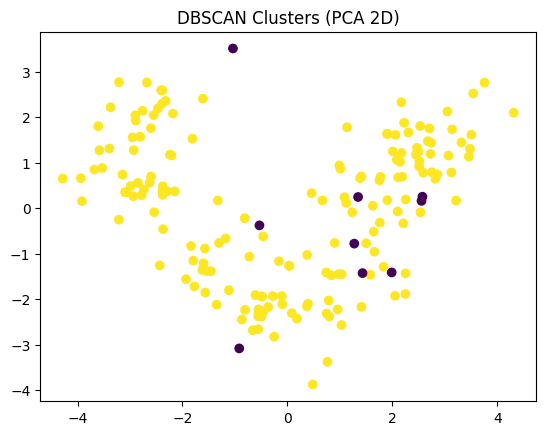

In [185]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

plt.scatter(pcs[:,0], pcs[:,1], c=pred)
plt.title("DBSCAN Clusters (PCA 2D)")
plt.show()
